<a href="https://colab.research.google.com/github/2303A51202/AIML-230351202/blob/main/Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_openml
df = fetch_openml(data_id=21)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1027: UserWarning: Version 1 of dataset car is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/21/car.arff
  warn(


In [ ]:
df.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
print(df['DESCR'])

**Author**: Marko Bohanec, Blaz Zupan  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/car+evaluation) - 1997   
**Please cite**: [UCI](http://archive.ics.uci.edu/ml/citation_policy.html)  

**Car Evaluation Database**  
This database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX (M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.).

The model evaluates cars according to the following concept structure:
 
    CAR                      car acceptability
    . PRICE                  overall price
    . . buying               buying price
    . . maint                price of the maintenance
    . TECH                   technical characteristics
    . . COMFORT              comfort
    . . . doors              number of doors
    . . . persons            capacity in terms of persons to carry
    . . . lug_boot           the size of luggage boot
    . . safety               estim

In [ ]:
df['feature_names']

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
Df = pd.DataFrame(df['data'],columns=df['feature_names'])
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   buying    1728 non-null   category
 1   maint     1728 non-null   category
 2   doors     1728 non-null   category
 3   persons   1728 non-null   category
 4   lug_boot  1728 non-null   category
 5   safety    1728 non-null   category
dtypes: category(6)
memory usage: 11.2 KB


In [ ]:
Df.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,high,high,2,2,big,high
freq,432,432,432,576,576,576


In [ ]:
# Sum of the count of null objects in all columns of data frame
np.sum(pd.isnull(Df).sum())

0

In [ ]:
df['target']

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [ ]:
Df['Cars'] = pd.DataFrame(df['target'])
Df.head()

,buying,maint,doors,persons,lug_boot,safety,Cars
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<ipython-input-18-f30d702f74bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cars',data=Df,palette='RdBu_r')


<Axes: xlabel='Cars', ylabel='count'>

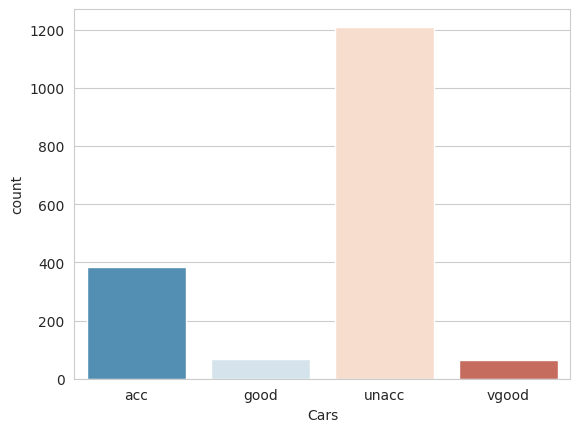

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Cars',data=Df,palette='RdBu_r')

<ipython-input-19-10a613a5c8a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cars',y=l[i], data=Df, palette='winter')
<ipython-input-19-10a613a5c8a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cars',y=l[i], data=Df, palette='winter')
<ipython-input-19-10a613a5c8a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cars',y=l[i], data=Df, palette='winter')
<ipython-input-19-10a613a5c8a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

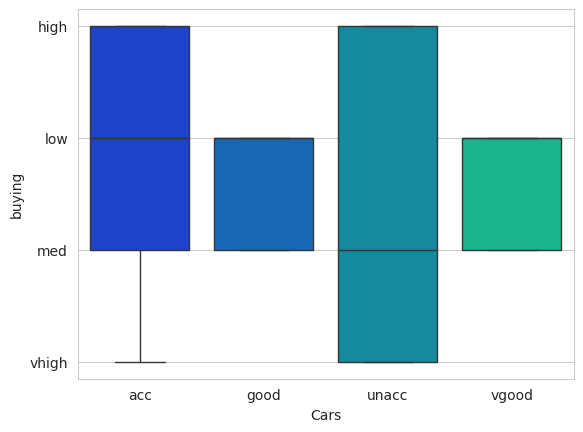

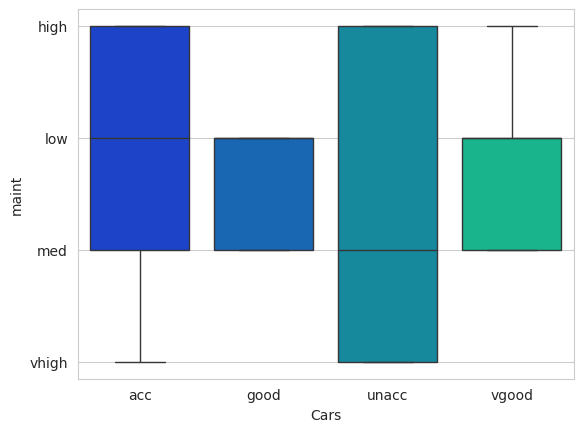

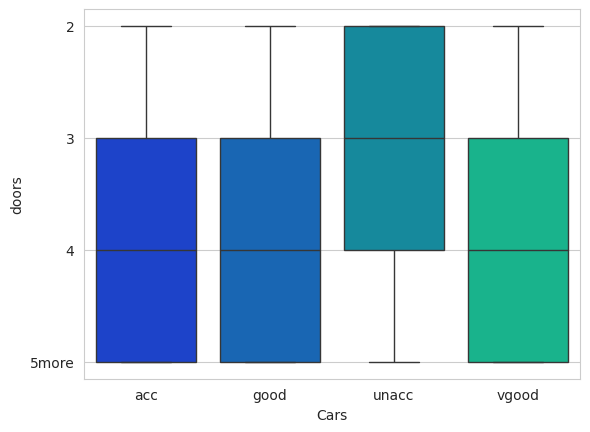

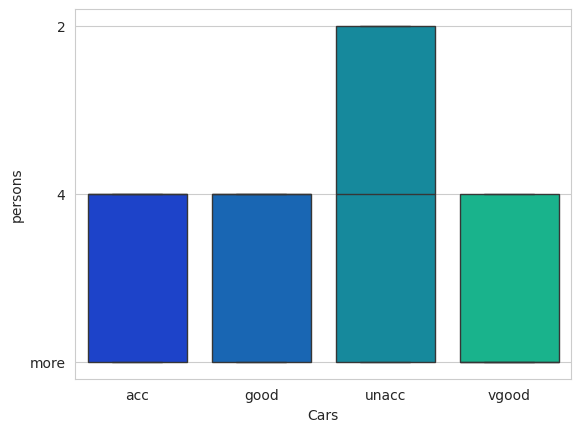

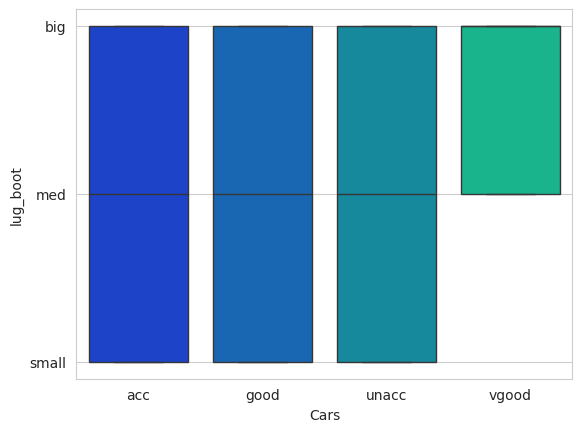

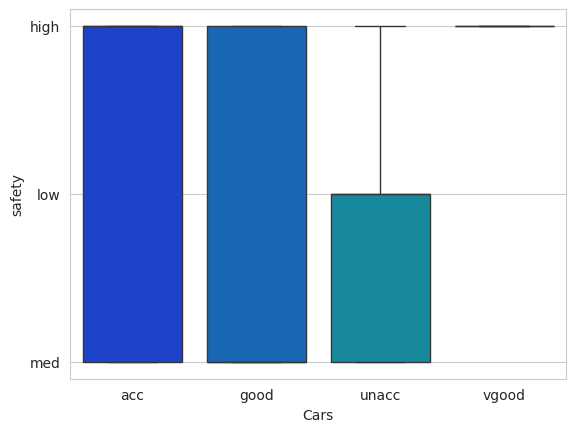

<Figure size 640x480 with 0 Axes>

In [ ]:
l=list(Df.columns[0:10])
for i in range(len(l)-1):
    sns.boxplot(x='Cars',y=l[i], data=Df, palette='winter')
    plt.figure()

Text(0.5, 1.0, 'Buying cars as a function of doors')

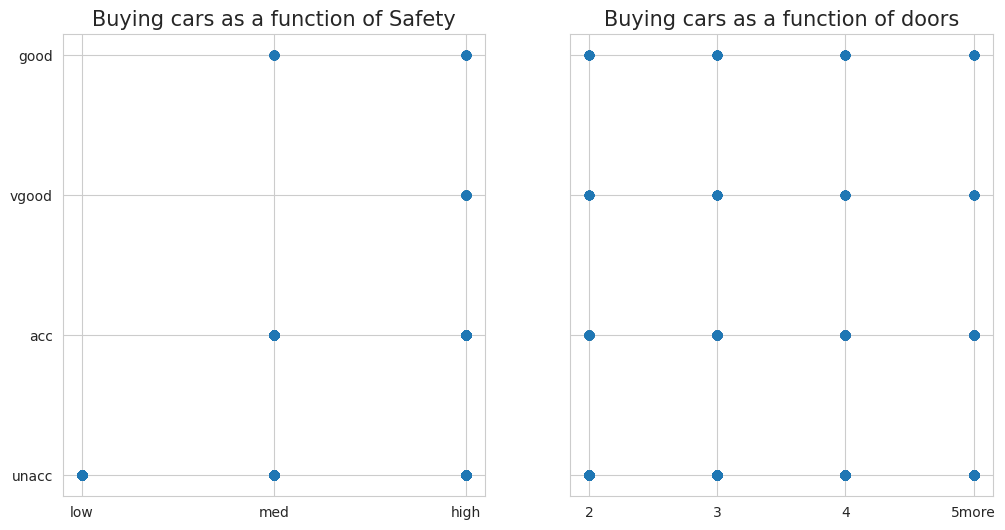

In [ ]:
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(Df['safety'],Df['Cars'])
ax1.set_title("Buying cars as a function of Safety",
              fontsize=15)
ax2.scatter(Df['doors'],Df['Cars'])
ax2.set_title("Buying cars as a function of doors",
              fontsize=15)

In [ ]:

df_feat = Df.drop('Cars',axis=1)
df_feat.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [ ]:

df_target = Df['Cars']
df_target.head()

,Cars
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(df_feat, df_target,test_size=0.30,random_state=101)

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
417,vhigh,low,5more,4,med,low
723,high,med,4,more,med,low
1248,med,low,4,2,big,low
1092,med,med,2,4,med,low
757,high,low,2,2,small,med


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [ ]:
import pandas as pd

# Assuming X_train is a pandas DataFrame
# Identify columns with non-numeric data
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to appropriate numerical data types
for col in non_numeric_cols:
    # Determine the appropriate data type based on the column's values
    if X_train[col].dtype == object:
        # If the column contains categorical values, convert to numerical using label encoding
        X_train[col] = X_train[col].astype('category').cat.codes
    else:
        # Otherwise, convert to numeric using a suitable method (e.g., pd.to_numeric)
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

# Now, you can fit the model without encountering the error
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
import pandas as pd

# Assuming X_test is a pandas DataFrame
# Identify columns with non-numeric data
non_numeric_cols = X_test.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to appropriate numerical data types
for col in non_numeric_cols:
    # Determine the appropriate data type based on the column's values
    if X_test[col].dtype == object:
        # If the column contains categorical values, convert to numerical using label encoding
        X_test[col] = X_test[col].astype('category').cat.codes
    else:
        # Otherwise, convert to numeric using a suitable method (e.g., pd.to_numeric)
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Now, you can make predictions without encountering the error
predictions = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[  0   0 108   0]
 [  0   0  21   0]
 [  0   0 374   0]
 [  0   0  16   0]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         acc       0.00      0.00      0.00       108
        good       0.00      0.00      0.00        21
       unacc       0.72      1.00      0.84       374
       vgood       0.00      0.00      0.00        16

    accuracy                           0.72       519
   macro avg       0.18      0.25      0.21       519
weighted avg       0.52      0.72      0.60       519



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Misclassification error rate:",round(np.mean(predictions!=y_test),3))

Misclassification error rate: 0.279


In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=1)

In [ ]:
grid.fit(X_train, y_train)


ValueError: Invalid parameter 'C' for estimator DecisionTreeClassifier(). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'].